# scikit - learn을 활용한 Resgression - Boston 집값 예측하기

In [2]:
# 1. data 가져오기

from sklearn.datasets import load_boston

boston_data = load_boston()

In [3]:
# 2. data 확인 

#print(boston_data)
print(boston_data.feature_names)
print(boston_data['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
# 3. pandas data frame으로 바꾸기

import pandas as pd

boston_pd = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
boston_pd.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# 4. Add target

boston_pd['MEDV'] = boston_data.target
boston_pd.head()
# 중앙값 추가

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# 5. NULL 값 확인하기 

boston_pd.isnull().sum()
# 빈 값이 없음을 확인할 수 있음

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

C:\kimsohyeon\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


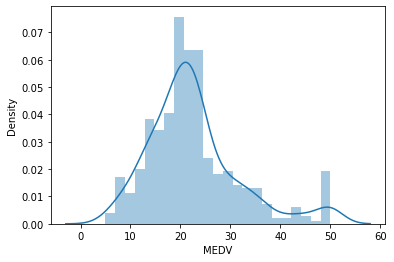

In [12]:
# 6. 집 값 분포 시각화

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(boston_pd['MEDV'])
plt.show()

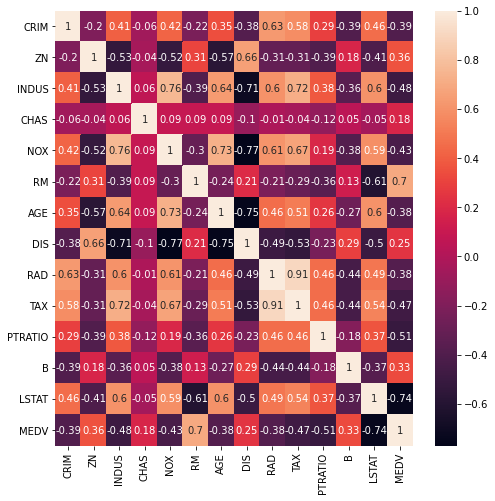

In [16]:
# 7. feature - target 상관관계 확인

correlation_matrix = boston_pd.corr().round(2)
plt.figure(figsize = (8,8))
sns.heatmap(data = correlation_matrix, annot = True)
plt.show()

In [20]:
# 8. X/Y 분리

X = boston_pd.drop(['MEDV', 'NOX', 'DIS', 'TAX'], axis = 1)
Y = boston_pd['MEDV']

print(X.shape)
print(Y.shape)

(506, 10)
(506,)


In [29]:
# 9. 학습 set과 평가 set 분리하기

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 9)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 10)
(102, 10)
(404,)
(102,)


In [32]:
# 10. data 정규화 과정

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [34]:
# 11. data regression 학습 

from sklearn.linear_model import LinearRegression

lim_model = LinearRegression()
lim_model.fit(X_train, Y_train)

LinearRegression()

In [36]:
# 12. 모델 평가

y_predict = lim_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_predict)
r2 = r2_score(Y_test, y_predict)

print('MSE = {}'.format(mse))
print('r2 = {}'.format(r2))

MSE = 29.111903780681388
r2 = 0.7122959025355963


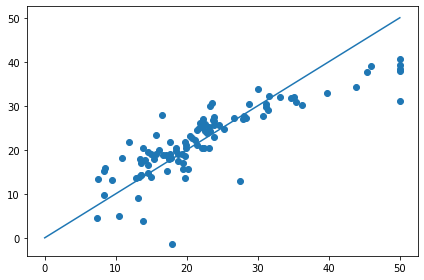

In [37]:
# 13. 모델 시각화

plt.scatter(Y_test, y_predict)
plt.plot([0,50], [0,50])
plt.tight_layout()